In [1]:
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from ampligraph.discovery import find_clusters
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
%store -r triples_arr
X = triples_arr
print(len(X))

29339


In [3]:
# Get the teams entities and their corresponding embeddings
triples_df = pd.DataFrame(X, columns=['s', 'p', 'o'])

pd.set_option('max_colwidth', 100)
triples_df

,s,p,o
0,https://data.cooperationdatabank.org/id/ENG00008_1.4.2,https://data.cooperationdatabank.org/vocab/prop/sequentiality,https://data.cooperationdatabank.org/id/sequentiality/sequential_turn-taking
1,https://data.cooperationdatabank.org/vocab/prop/sequentiality_H1,http://www.w3.org/2000/01/rdf-schema#subPropertyOf,https://data.cooperationdatabank.org/vocab/prop/sequentiality
2,https://data.cooperationdatabank.org/vocab/class/SequentialityVariable,http://www.w3.org/2000/01/rdf-schema#subClassOf,https://data.cooperationdatabank.org/vocab/class/IndependentVariable
3,https://data.cooperationdatabank.org/id/ENG00008_1,https://data.cooperationdatabank.org/vocab/prop/reportsEffect,https://data.cooperationdatabank.org/id/ENG00008_1.4.1.2.d
4,https://data.cooperationdatabank.org/vocab/prop/sequentiality,http://www.w3.org/2000/01/rdf-schema#subPropertyOf,https://data.cooperationdatabank.org/vocab/prop/SequentialityVariable
...,...,...,...
29334,https://data.cooperationdatabank.org/id/ENG02681_1.1.3,https://data.cooperationdatabank.org/vocab/prop/feedbackTarget,https://data.cooperationdatabank.org/id/feedbacktarget/absent
29335,https://data.cooperationdatabank.org/id/ENG02681_1.1.2.3.d,https://data.cooperationdatabank.org/vocab/prop/treatment,https://data.cooperationdatabank.org/id/ENG02681_1.1.2
29336,https://data.cooperationdatabank.org/id/ENG02681_1.1.2.3.d,https://data.cooperationdatabank.org/vocab/prop/dependentVariable,https://data.cooperationdatabank.org/id/dependentvariable/contributions
29337,https://data.cooperationdatabank.org/id/ENG02681_1.1.2,https://data.cooperationdatabank.org/vocab/prop/feedbackTarget,https://data.cooperationdatabank.org/id/feedbacktarget/other


In [4]:
variables1 = triples_df.s[triples_df.p == 'https://data.cooperationdatabank.org/vocab/prop/hasPositiveEffectOn'].unique()
variables2 = triples_df.s[triples_df.p == 'https://data.cooperationdatabank.org/vocab/prop/hasNegativeEffectOn'].unique()
variables3 = triples_df.s[triples_df.p == 'https://data.cooperationdatabank.org/vocab/prop/hasNoEffectOn'].unique()
# np.append(variables1, variables2, variables3)
variables = np.concatenate((variables1, variables2, variables3))
variables = np.unique(variables)

In [5]:
print(len(variables)) 
variables

374


array(['https://data.cooperationdatabank.org/vocab/prop/academicDiscipline_H1',
       'https://data.cooperationdatabank.org/vocab/prop/academicDiscipline_H2',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel_H1',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel_H2',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel_H3',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade_H1',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade_H2',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade_H3',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort_H1',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort_H2',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort_H3',
       'https://data.cooperationdatabank.org/vocab/prop/anchor_H1',
       'https://data.cooperationdatabank.org/vocab/prop/anchor_H2',
       'https://data.coope

In [6]:
vars_series = pd.Series()
for item in variables: 
    result = item.find('_H')
    variable = item[:result]
    
    vars_series = vars_series.append(pd.Series([variable]))
    
unique_vars = vars_series.unique()

print(len(unique_vars))
print(unique_vars)

c:\users\roos\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


array(['https://data.cooperationdatabank.org/vocab/prop/academicDiscipline',
       'https://data.cooperationdatabank.org/vocab/prop/academicGradeLevel',
       'https://data.cooperationdatabank.org/vocab/prop/academicGrade',
       'https://data.cooperationdatabank.org/vocab/prop/ageCohort',
       'https://data.cooperationdatabank.org/vocab/prop/anchor',
       'https://data.cooperationdatabank.org/vocab/prop/anonymityManipul',
       'https://data.cooperationdatabank.org/vocab/prop/blockOfCooperation',
       'https://data.cooperationdatabank.org/vocab/prop/cognitiveLoadTreatment',
       'https://data.cooperationdatabank.org/vocab/prop/communicationContent',
       'https://data.cooperationdatabank.org/vocab/prop/communicationOccurrence',
       'https://data.cooperationdatabank.org/vocab/prop/communicationOptional',
       'https://data.cooperationdatabank.org/vocab/prop/communicationReal',
       'https://data.cooperationdatabank.org/vocab/prop/communicationTreatment',
       'ht

128

In [8]:
from ampligraph.latent_features import restore_model
model = restore_model('./best_model.pkl')

In [9]:
variable_embeddings = dict(zip(unique_vars, model.get_embeddings(unique_vars)))
variable_embeddings_array = np.array([i for i in variable_embeddings.values()])
variable_embeddings_array.shape

(128, 400)

In [10]:
def prefix_abbreviation(df):
    for name, values in df.iteritems():    
        df['variables'] = df['variables'].str.replace('https://data.cooperationdatabank.org/vocab/prop/', '')
#         df['variables'] = df['variables'].str.replace('Variable', 'V')
    return df

In [11]:
# Project embeddings into 2D space via PCA
embeddings_2d = PCA(n_components=2).fit_transform(variable_embeddings_array)

In [73]:
from sklearn.decomposition import SparsePCA
# Project embeddings into 2D space via PCA
embeddings_2d = SparsePCA(n_components=2).fit_transform(variable_embeddings_array)

In [12]:
import umap.umap_ as umap
reducer = umap.UMAP()

embedding_2d = reducer.fit_transform(variable_embeddings_array)
embedding_2d.shape

(128, 2)

In [13]:
#  Sanity check
len(embeddings_2d)

128

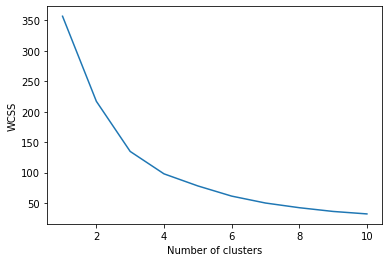

In [102]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=400, random_state=0)
    kmeans.fit(embedding_2d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
df = pd.DataFrame({"variables": unique_vars, 
                   "clusters": "cluster" + pd.Series(clusters).astype(str),
                   "embedding1": embedding_2d[:, 0],
                   "embedding2": embedding_2d[:, 1]})

def prefix_abbreviation(df):
    for name, values in df.iteritems():    
        df['variables'] = df['variables'].str.replace('https://data.cooperationdatabank.org/vocab/prop/', '')
#         df['variables'] = df['variables'].str.replace('Variable', 'V')
    return df

plot_df = prefix_abbreviation(df)

In [15]:
# Cluster embeddings (on the original space)
clustering_algorithm = KMeans(n_clusters=23, n_init=100, max_iter=500, random_state=0)
clusters = find_clusters(unique_vars, model, clustering_algorithm, mode='entity')

In [187]:
pd.set_option('max_rows', 300)
plot_df

,variables,clusters,embedding1,embedding2
0,academicDiscipline,cluster9,3.875805,11.567398
1,academicGradeLevel,cluster9,3.824435,11.545485
2,academicGrade,cluster9,3.859631,11.441647
3,ageCohort,cluster3,1.423086,8.357802
4,anchor,cluster14,1.831722,7.952875
5,anonymityManipul,cluster10,3.669331,7.286797
6,blockOfCooperation,cluster19,2.839003,11.399413
7,cognitiveLoadTreatment,cluster20,3.966331,8.771012
8,communicationContent,cluster4,4.855161,8.128223
9,communicationOccurrence,cluster4,4.923518,8.134427


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=23)
kmeans.fit(embedding_2d)
y_kmeans = kmeans.predict(embedding_2d)

197

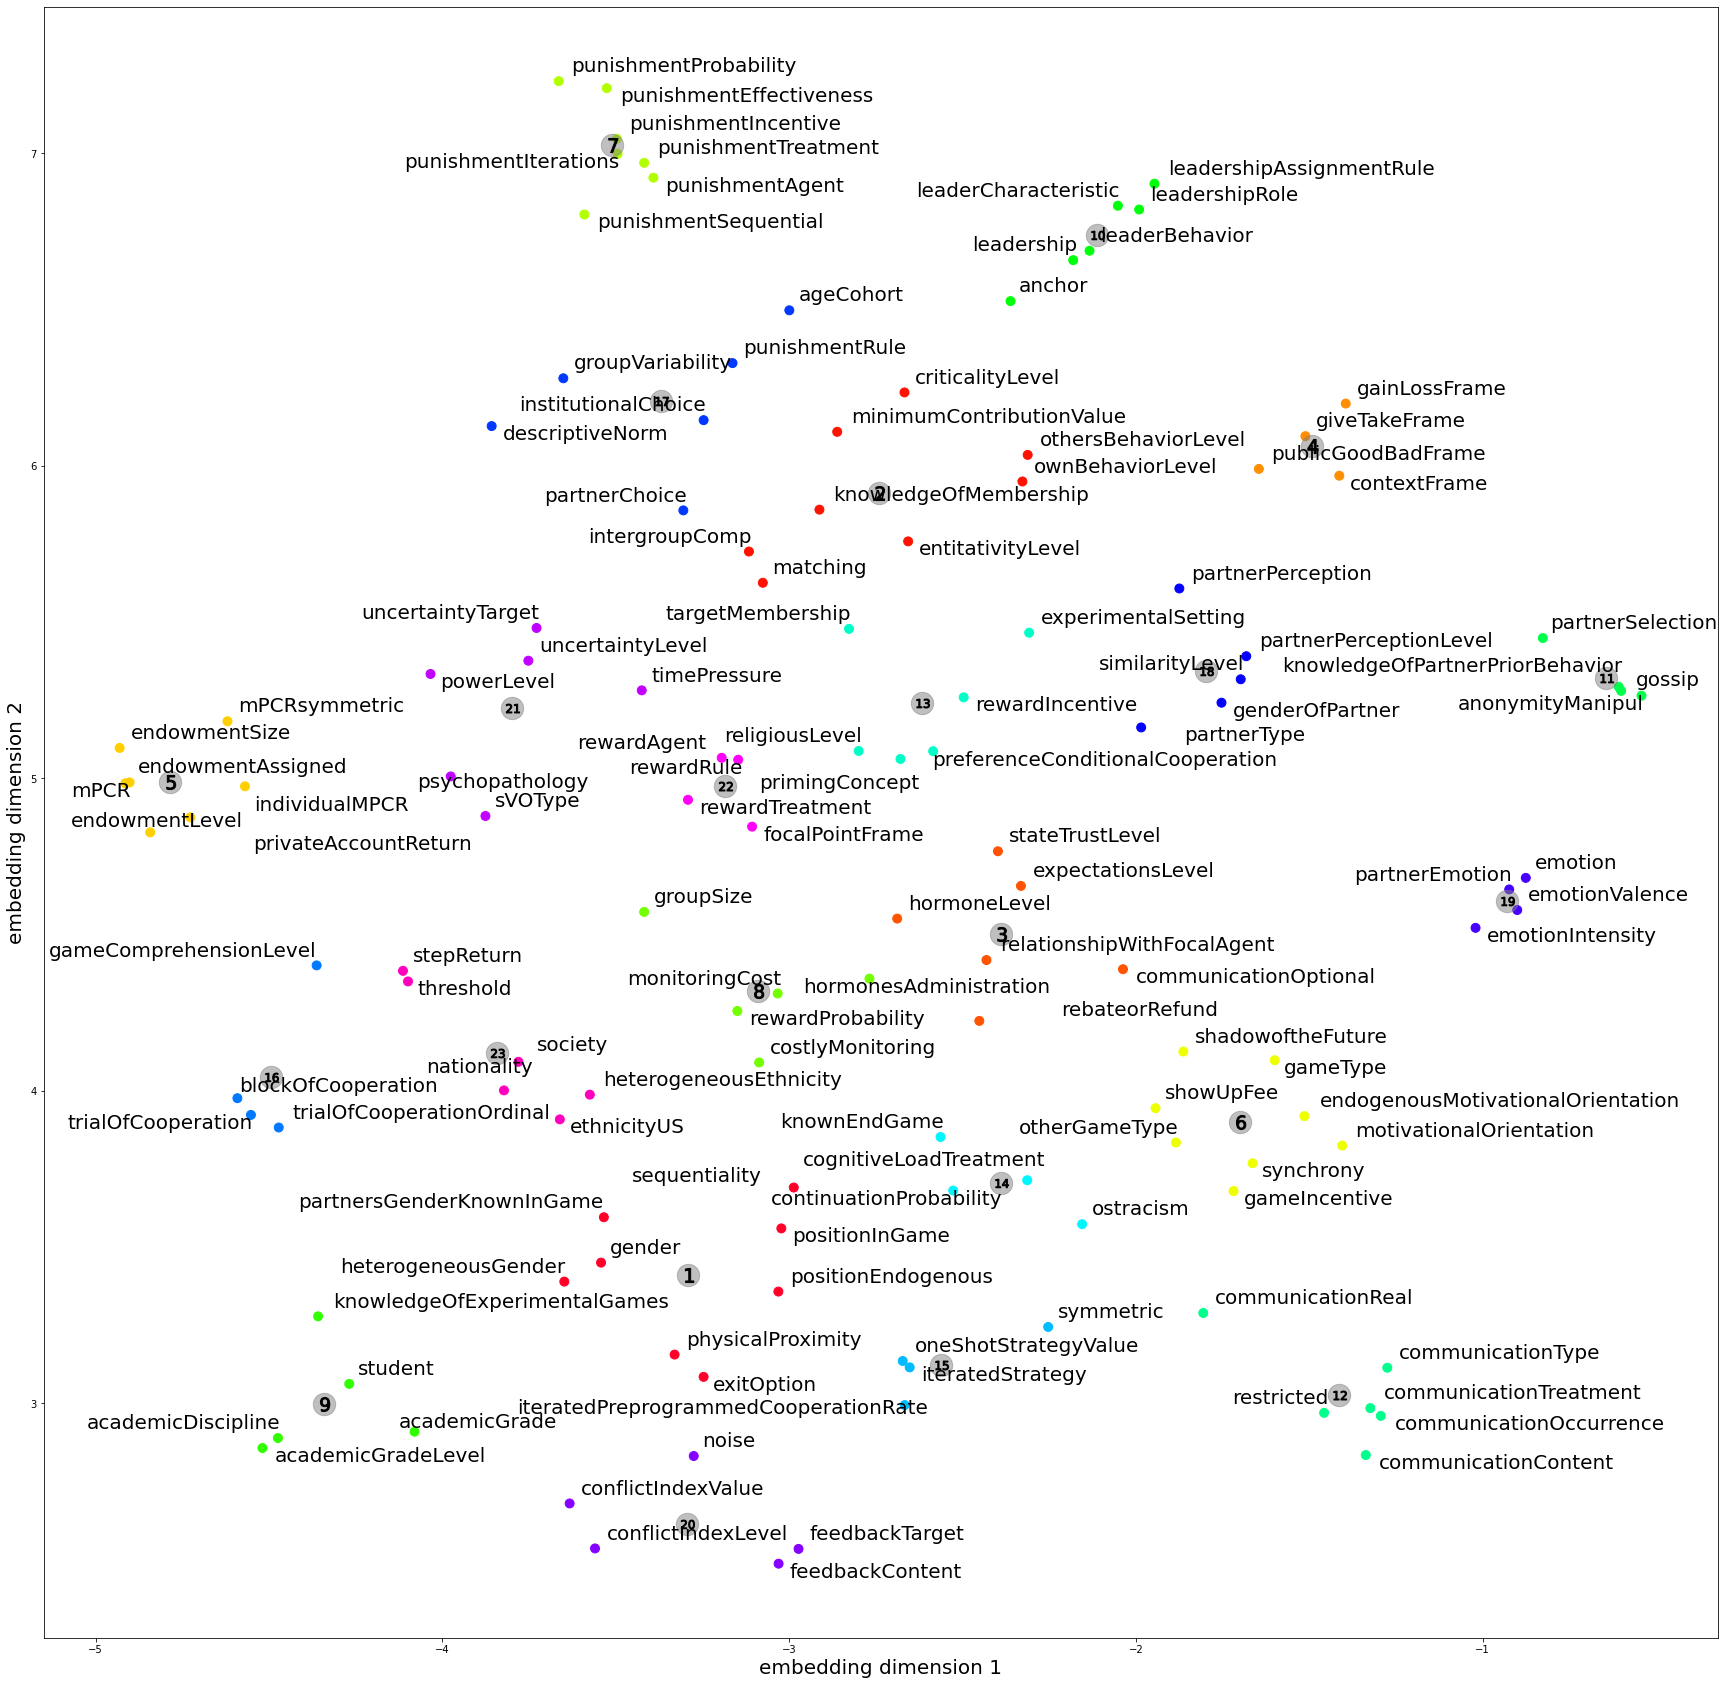

In [22]:
X = embedding_2d

centers = kmeans.cluster_centers_

plt.figure(figsize=(30, 30))
texts = []
for i, point in plot_df.iterrows():
    texts.append(plt.text(point['embedding1']+0.02,
                 point['embedding2']+0.01,
                 str(point["variables"]), fontsize = 20))
ax = plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=80, cmap='gist_rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=500, alpha=0.5, marker='o');
for i, c in enumerate(centers):
    r = i+1
    plt.scatter(c[0], c[1], marker='$%d$' % r, c='black', alpha=1, s=200, edgecolor='k')

plt.xlabel('embedding dimension 1', fontsize=20)
plt.ylabel('embedding dimension 2', fontsize=20)
adjust_text(texts)

In [ ]:
np.random.seed(0)

# Plot 2D embeddings with variable labels 
def plot_clusters(hue):
    loop = tqdm(total = len(plot_df), position=0, leave=False)
    plt.figure(figsize=(20, 20))
    plt.title("{} embeddings".format(hue).capitalize())
   
        
    font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 14}

    plt.rc('font', **font)
    
    ax = sns.scatterplot(data=plot_df,
                         x="embedding1", y="embedding2")
    texts = []
    for i, point in plot_df.iterrows():
        texts.append(plt.text(point['embedding1']+0.02,
                     point['embedding2']+0.01,
                     str(point["variables"])))
        loop.set_description("Loading...".format(i))
        loop.update(1)

    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
#     adjust_text(texts)
    
    loop.close()
    
plot_clusters("cluster")

In [183]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = embedding_2d

For n_clusters = 10 The average silhouette_score is : 0.40807763
For n_clusters = 11 The average silhouette_score is : 0.4093905
For n_clusters = 12 The average silhouette_score is : 0.41483727
For n_clusters = 13 The average silhouette_score is : 0.4155338
For n_clusters = 14 The average silhouette_score is : 0.42071438
For n_clusters = 15 The average silhouette_score is : 0.43352216
For n_clusters = 16 The average silhouette_score is : 0.43708223
For n_clusters = 17 The average silhouette_score is : 0.44829768
For n_clusters = 18 The average silhouette_score is : 0.4533275
For n_clusters = 19 The average silhouette_score is : 0.4559842
For n_clusters = 20 The average silhouette_score is : 0.47669637
For n_clusters = 21 The average silhouette_score is : 0.4498954
For n_clusters = 22 The average silhouette_score is : 0.47234294
For n_clusters = 23 The average silhouette_score is : 0.49114767
For n_clusters = 24 The average silhouette_score is : 0.48668987
For n_clusters = 25 The averag

c:\users\roos\tf\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 30 The average silhouette_score is : 0.5254439
For n_clusters = 31 The average silhouette_score is : 0.5187996
For n_clusters = 32 The average silhouette_score is : 0.503835
For n_clusters = 33 The average silhouette_score is : 0.5340541
For n_clusters = 34 The average silhouette_score is : 0.5309912
For n_clusters = 35 The average silhouette_score is : 0.5227134
For n_clusters = 36 The average silhouette_score is : 0.506902
For n_clusters = 37 The average silhouette_score is : 0.52024627
For n_clusters = 38 The average silhouette_score is : 0.517604
For n_clusters = 39 The average silhouette_score is : 0.5279685


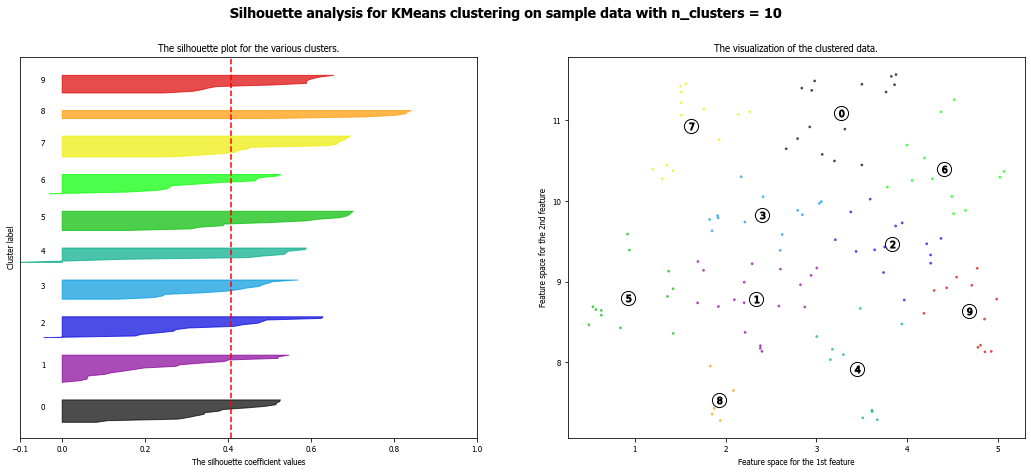

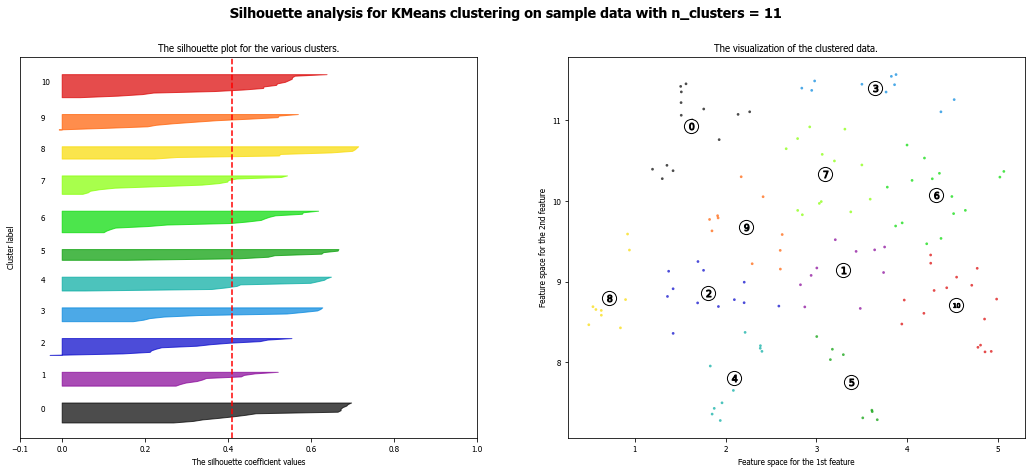

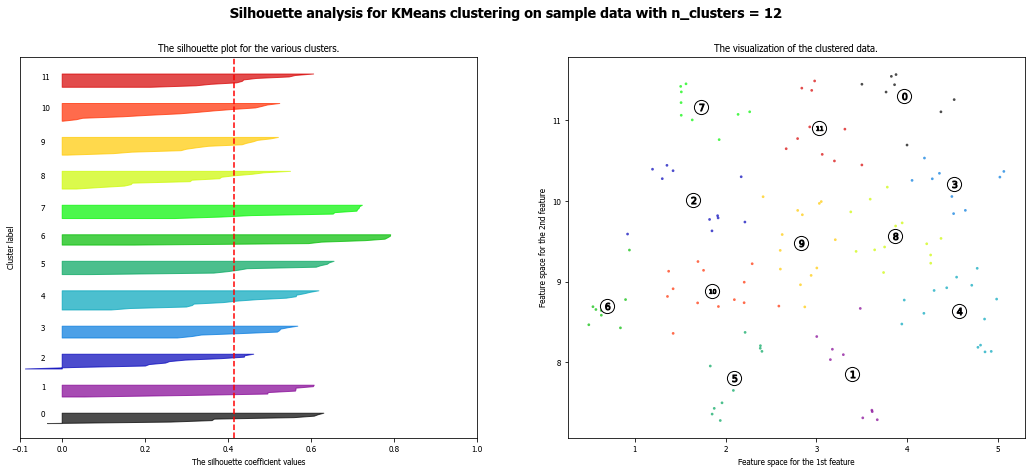

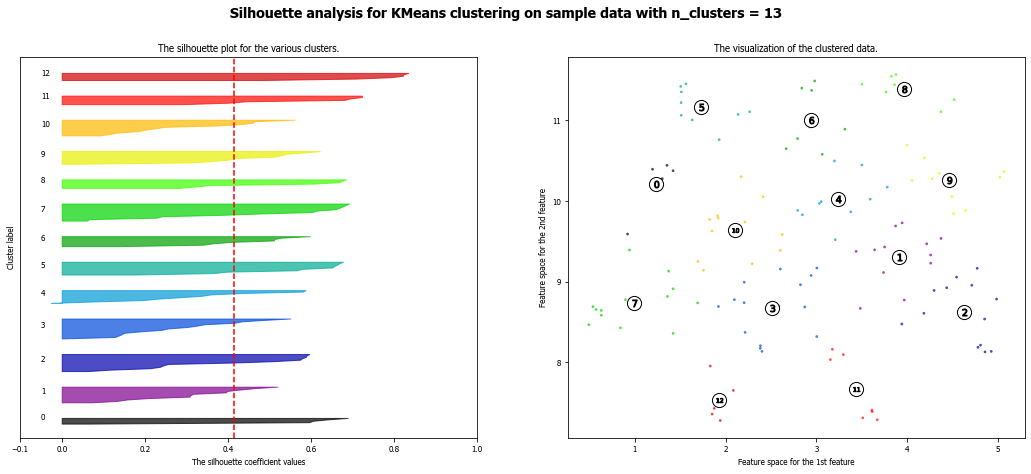

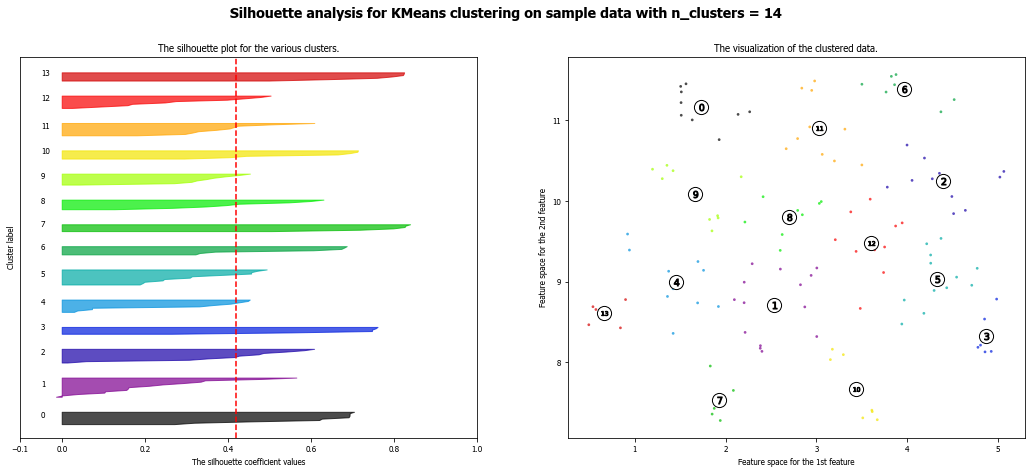

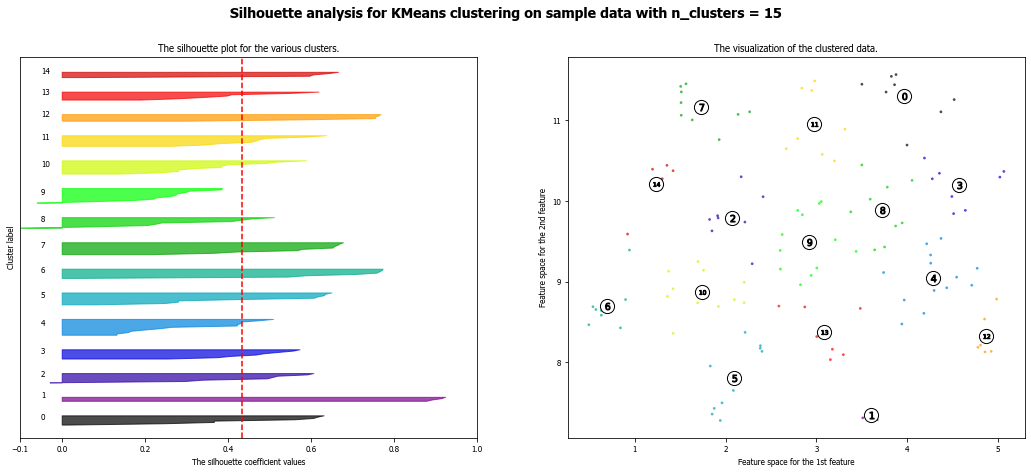

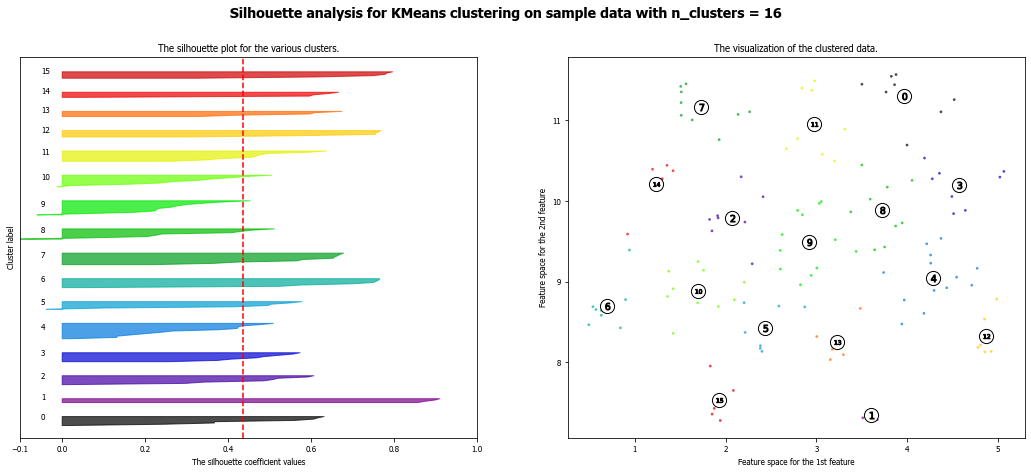

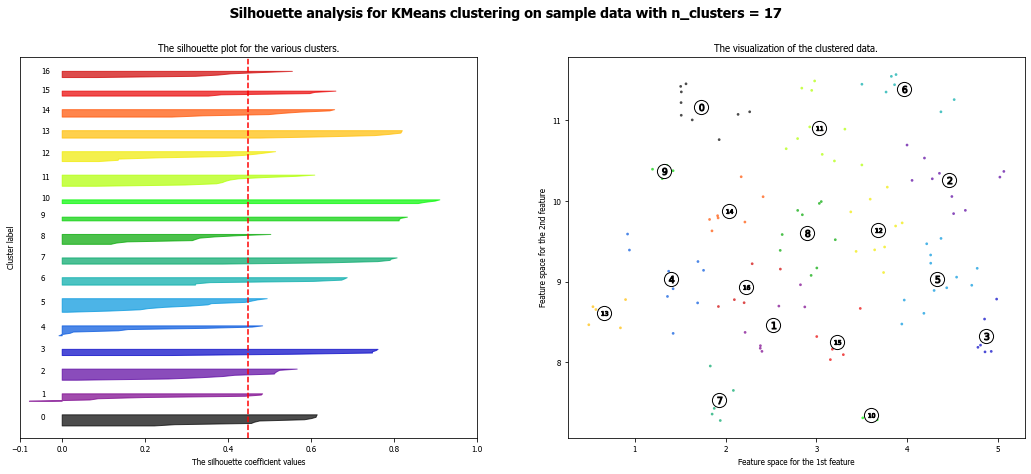

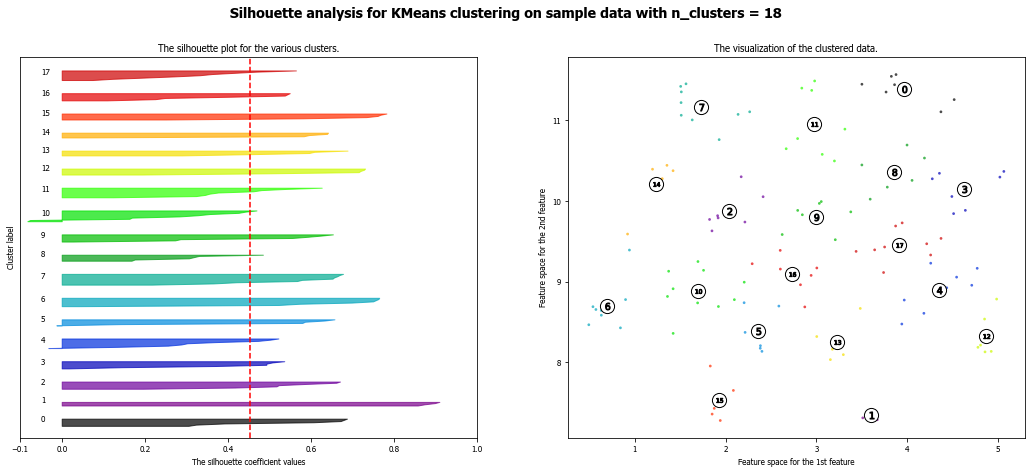

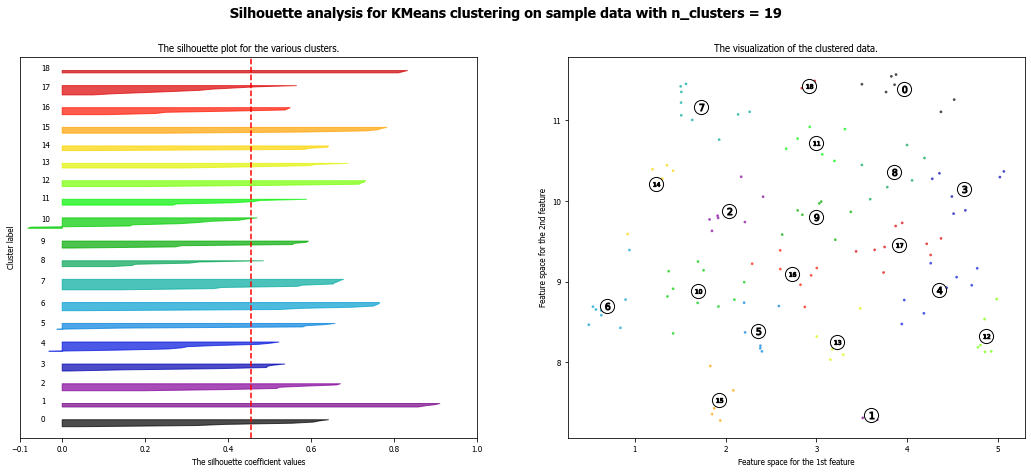

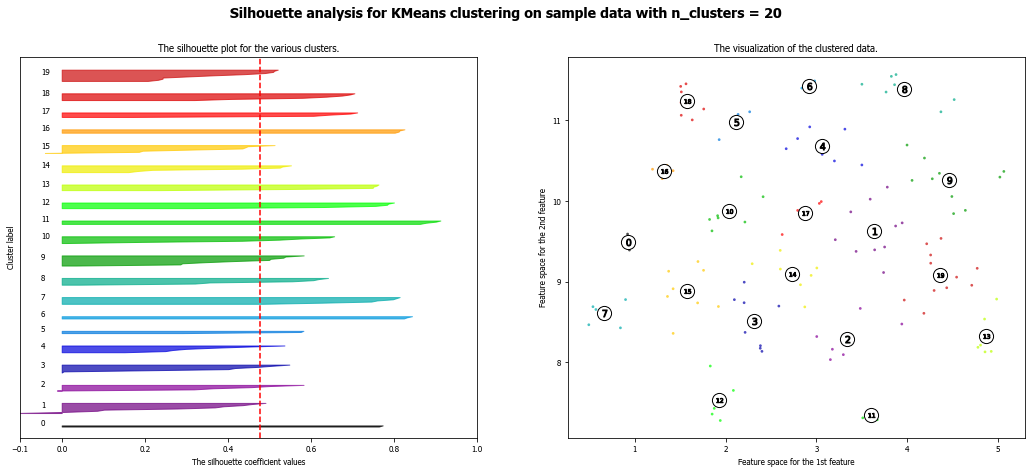

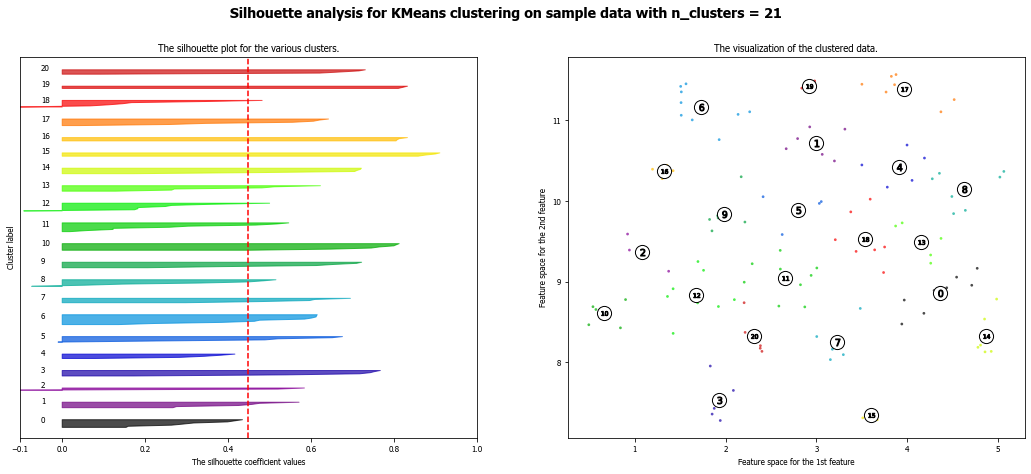

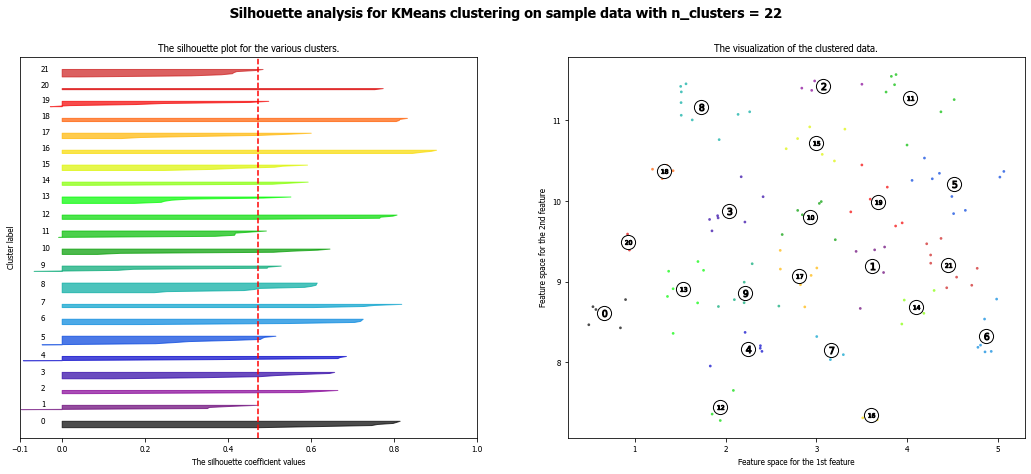

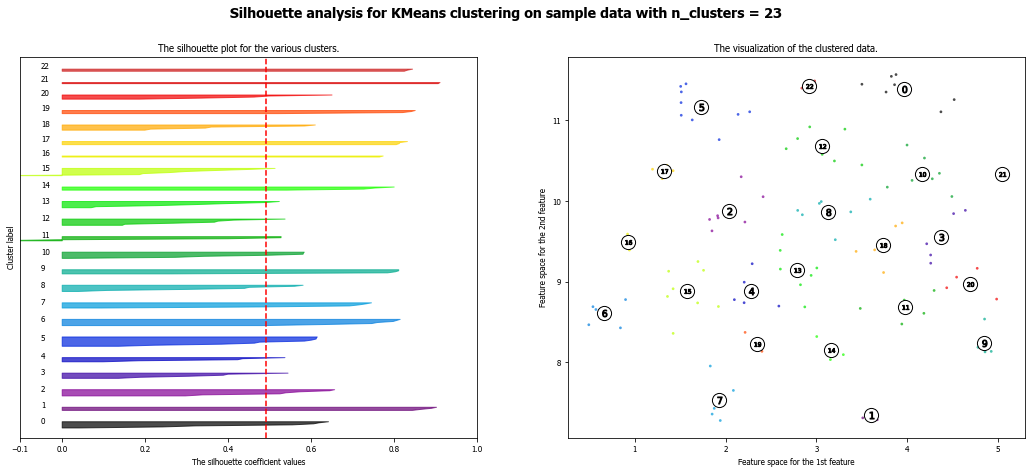

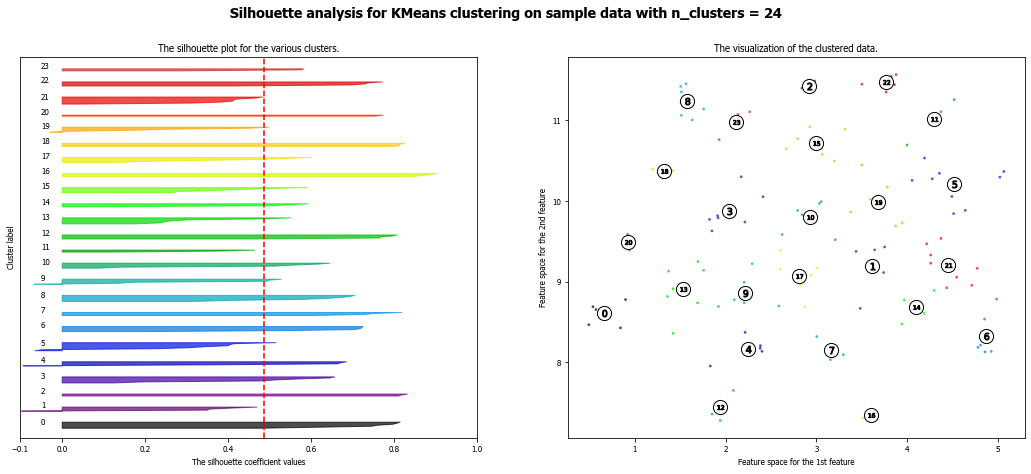

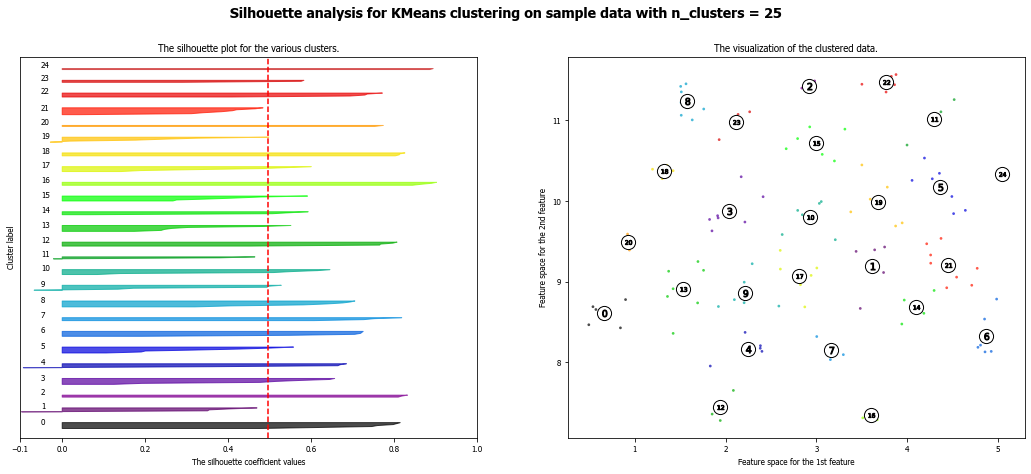

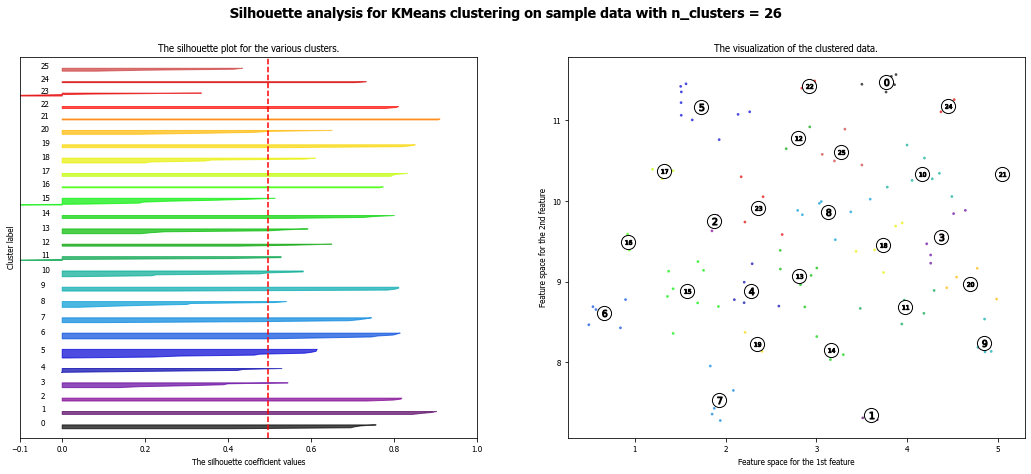

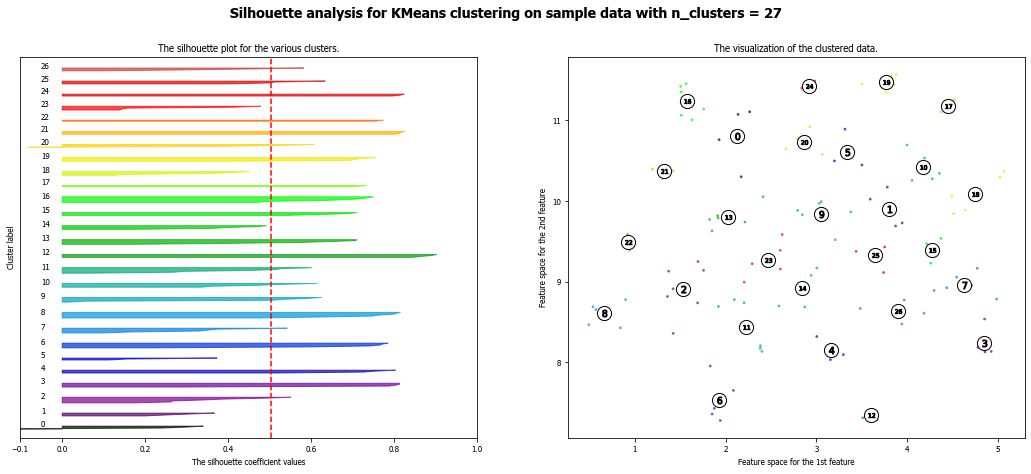

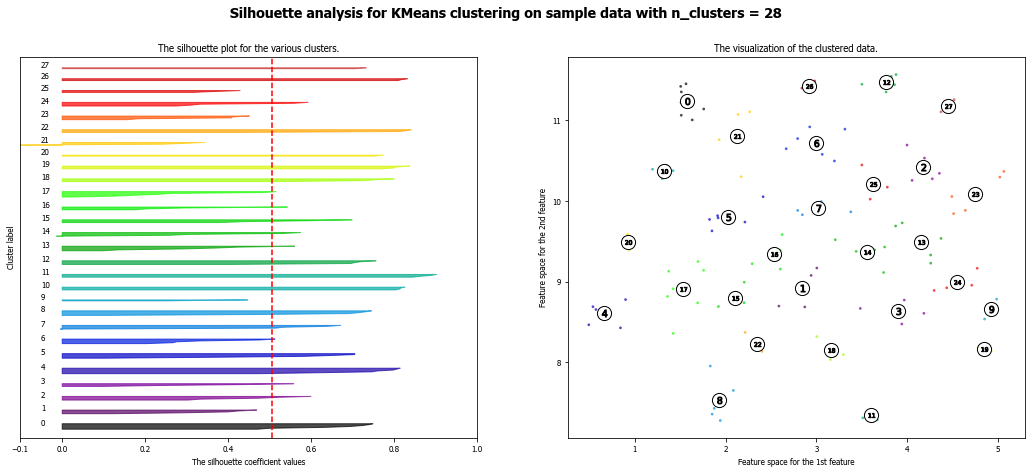

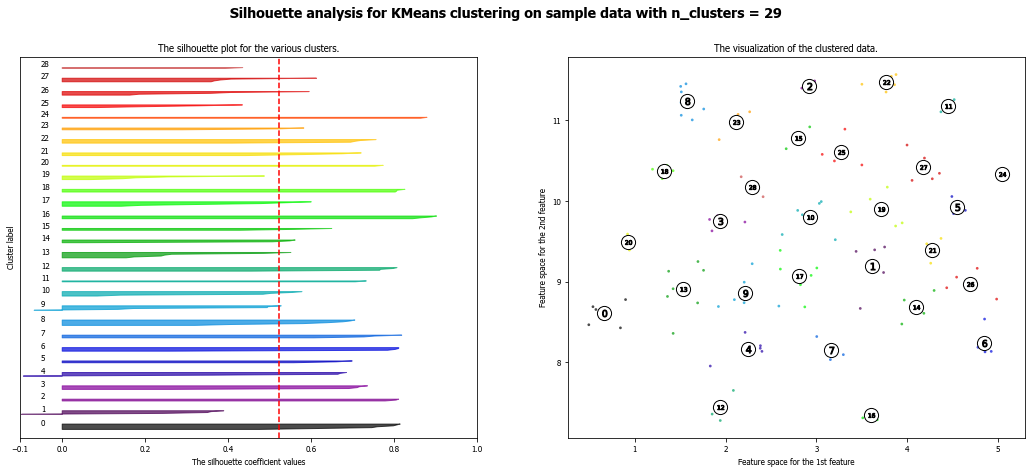

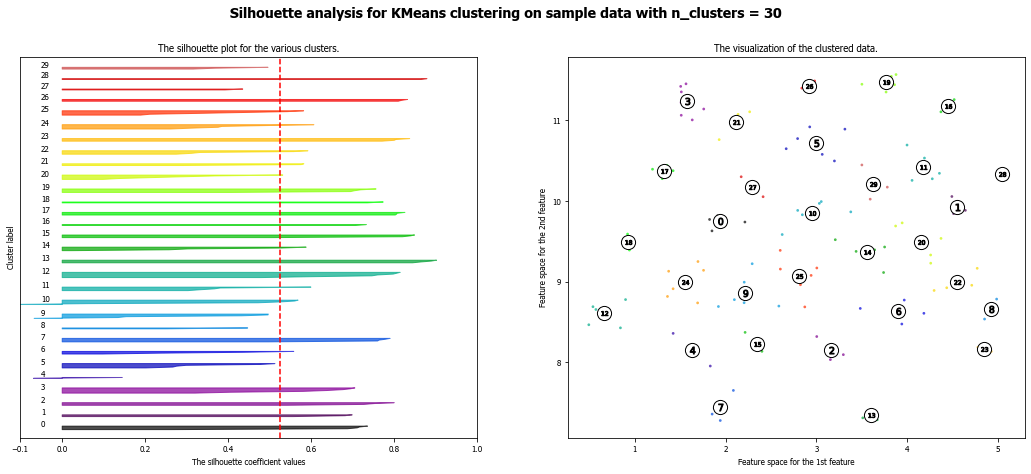

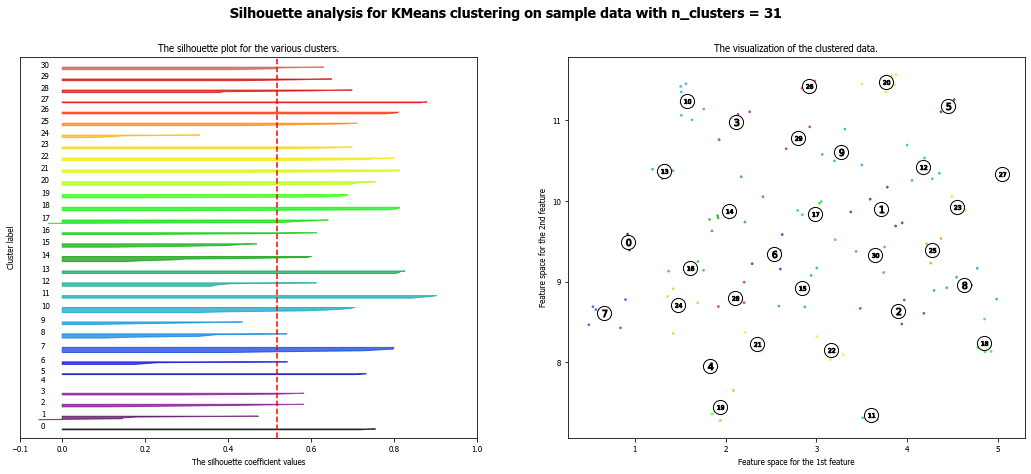

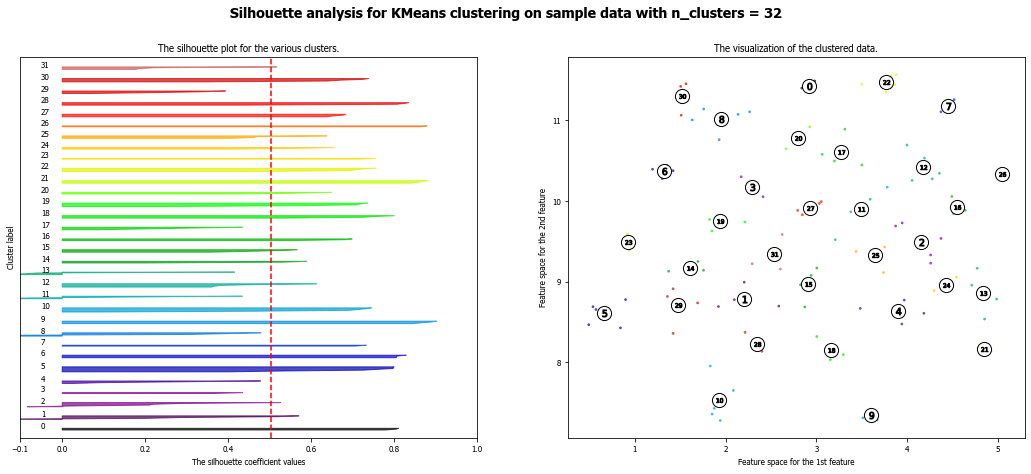

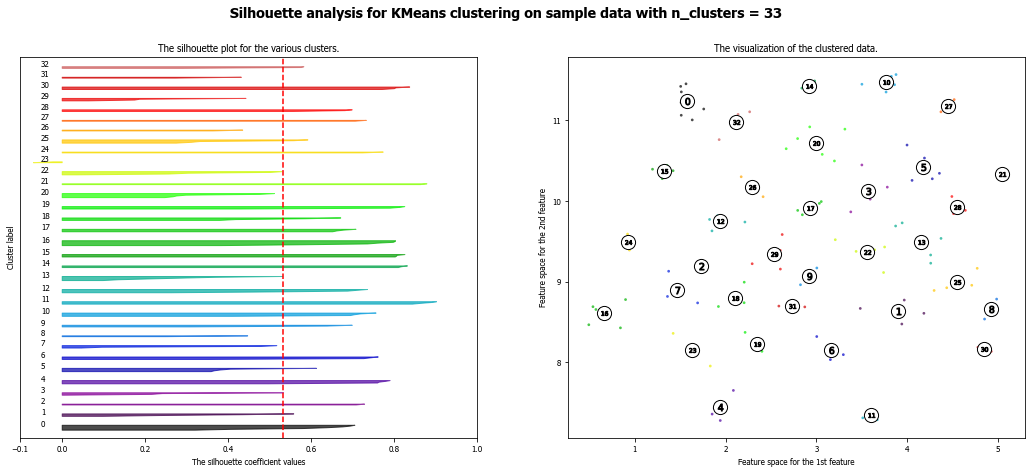

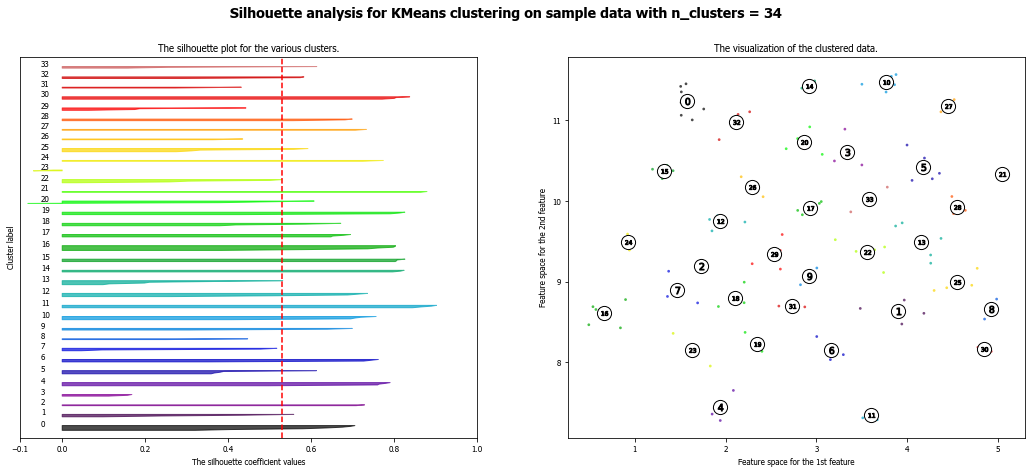

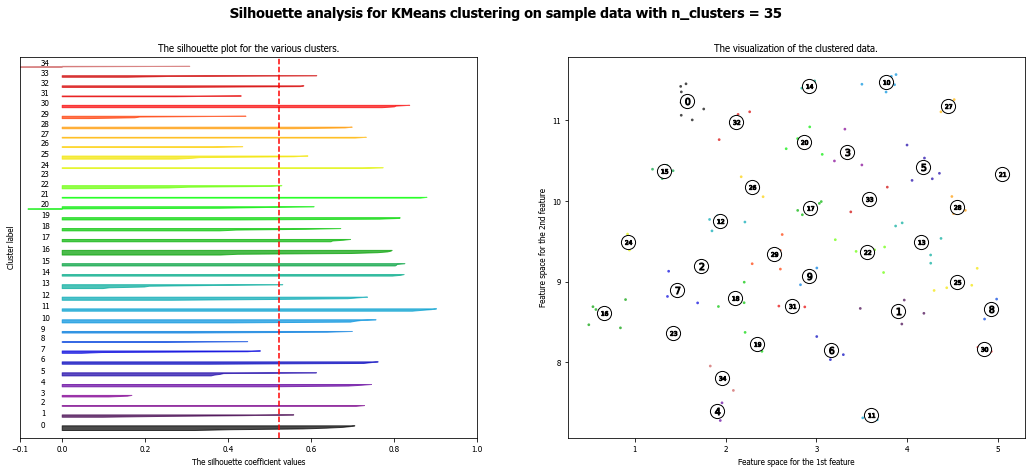

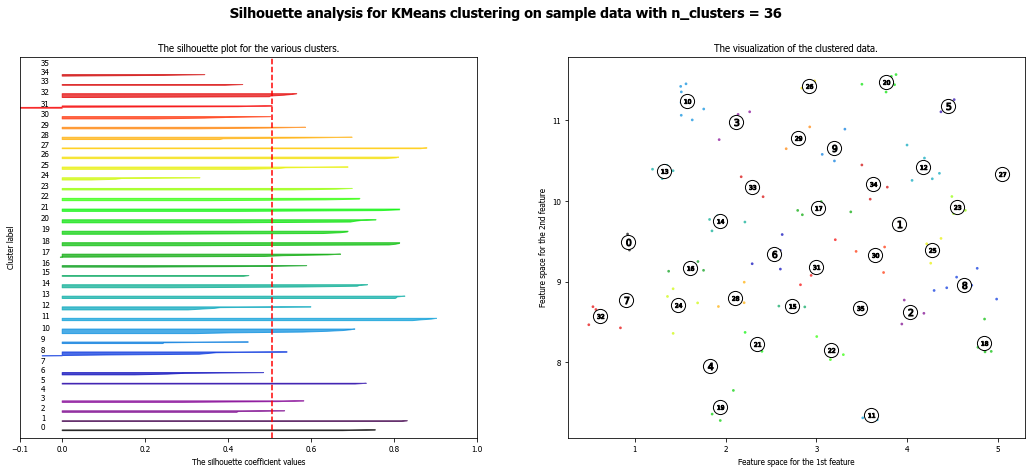

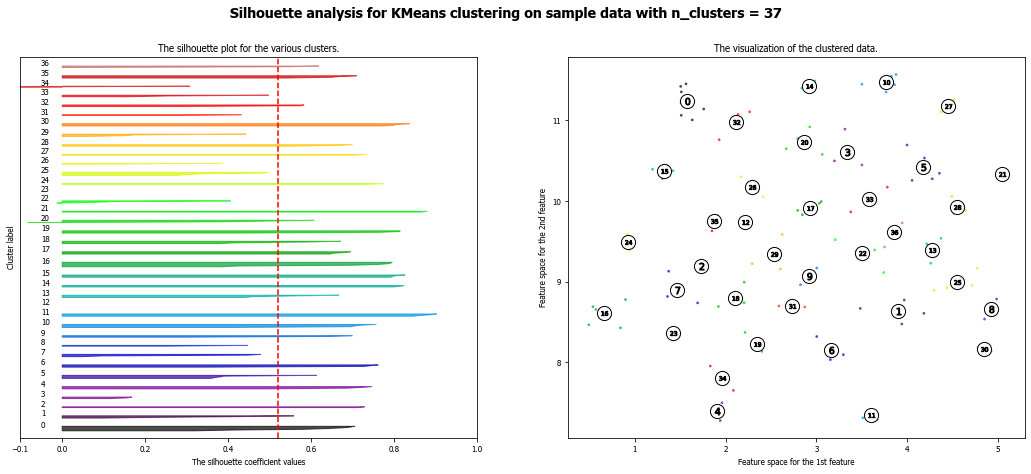

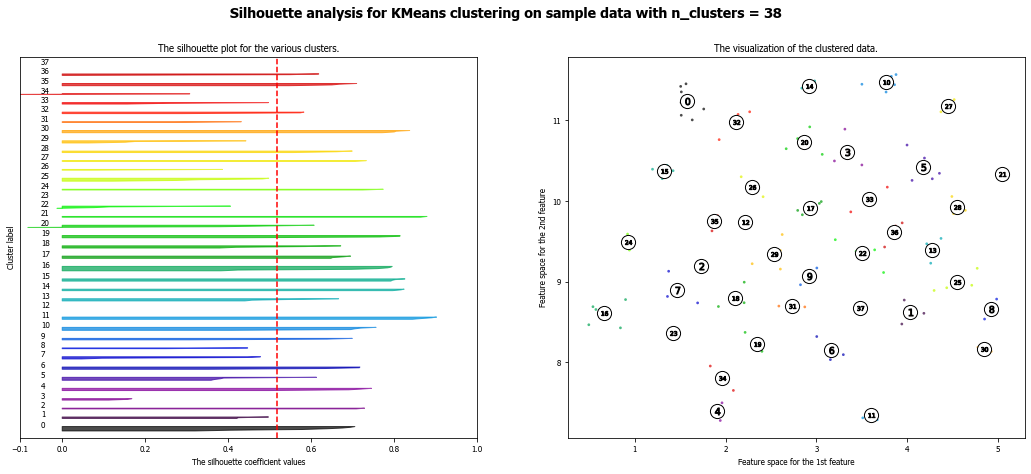

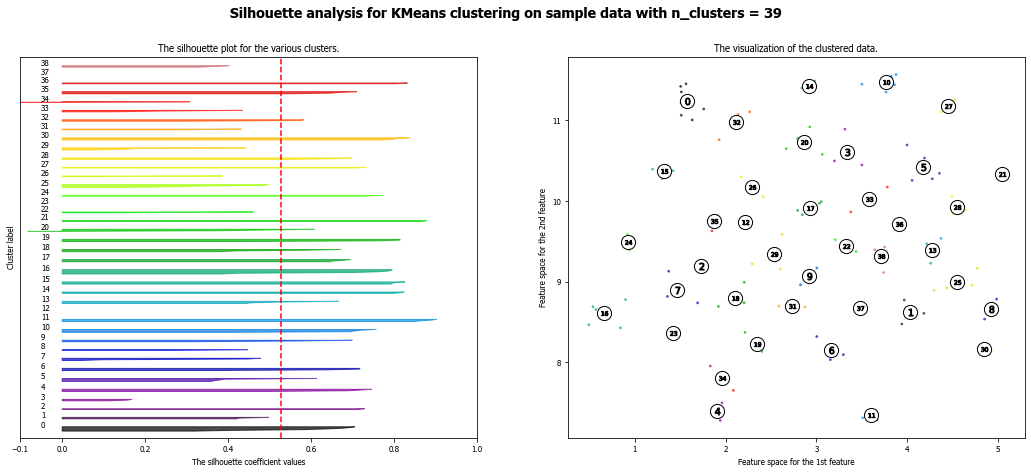

In [149]:
range_n_clusters = range(10, 40) 

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
import requests
from ampligraph.datasets import load_from_csv
url = 'https://ampligraph.s3-eu-west-1.amazonaws.com/datasets/football.csv'
open('football.csv', 'wb').write(requests.get(url).content)
X = load_from_csv('.', 'football.csv', sep=',')[:, 1:]

In [ ]:
df = pd.DataFrame(X, columns=["s", "p", "o"])
df.head(100)

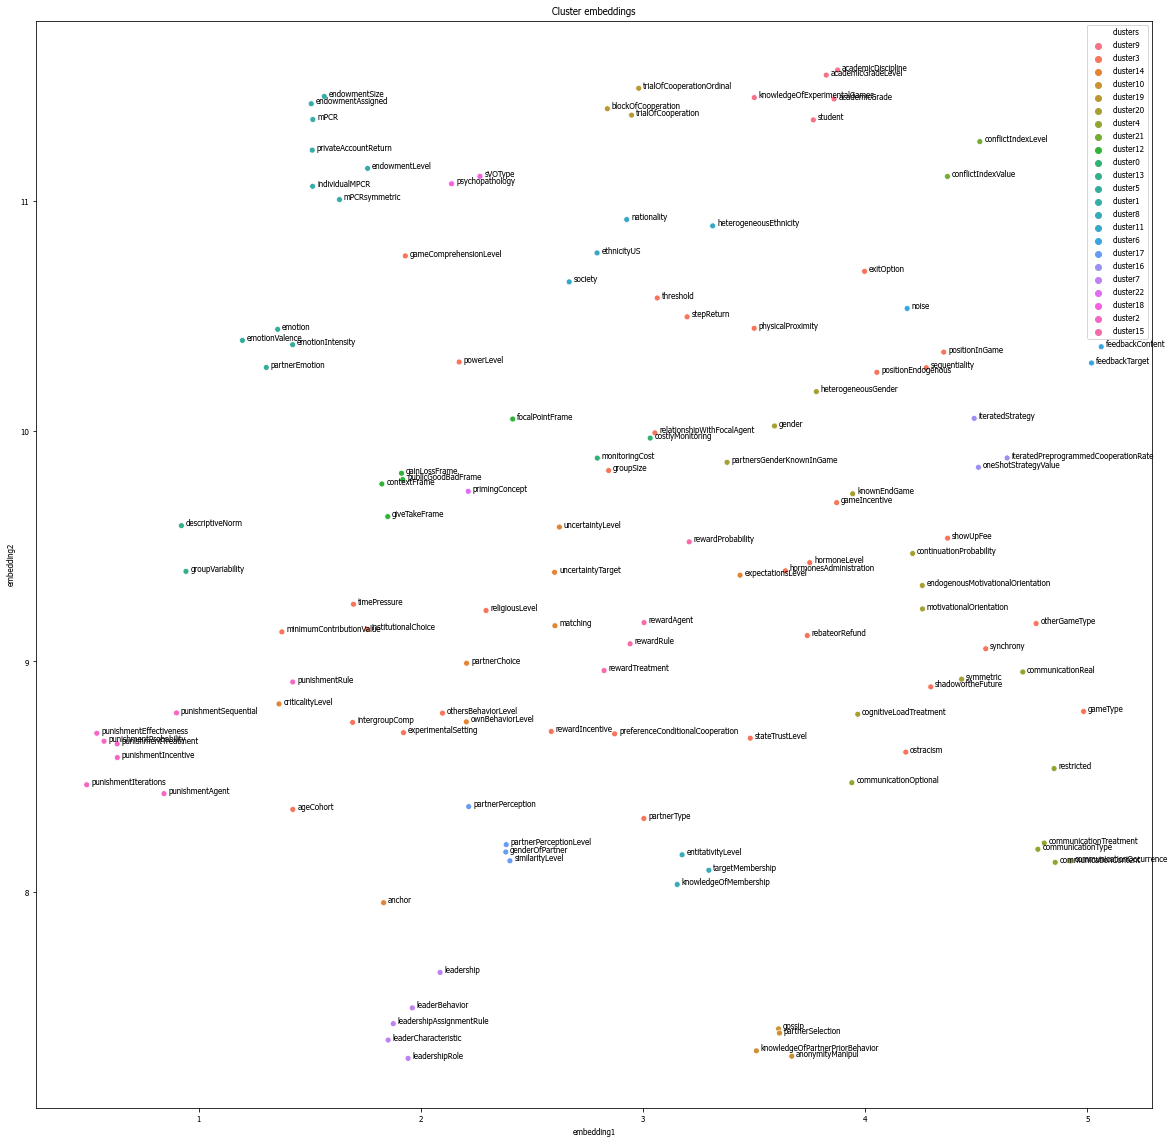

In [152]:
plt.figure(figsize=(20, 20))
plt.title("Cluster embeddings")
ax = sns.scatterplot(data=plot_df, x="embedding1", y="embedding2", hue="clusters")
texts = []
for i, point in plot_df.iterrows():
    texts.append(plt.text(point['embedding1']+.02, point['embedding2'], point['variables']))
# adjust_text(texts)

In [112]:

range_n_clusters = [10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(16, 16)


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')
    texts = []
    for i, point in plot_df.iterrows():
        texts.append(plt.text(point['embedding1']+0.02,
                     point['embedding2']+0.01,
                     str(point["variables"])))
    font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 8}

    plt.rc('font', **font)
    adjust_text(texts)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 10 The average silhouette_score is : 0.5574622025623035


KeyboardInterrupt: 

ValueError: Image size of 6790x92015 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1152x1152 with 1 Axes>

In [ ]:
def unique(trends): 
    output = []
    for x in trends:
        if x not in output:
            output.append(x)
    return output

        
UniqueSuperProperties = unique(superProperties)